# 🔹 B. Player-Level Insights


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Top 10 run-scorers of all time

In [2]:
runs=pd.read_csv(r"R:\IPL-DATA-ANALYSIS\Data\most_runs_average_strikerate.csv")

In [3]:
runs.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


In [4]:
runs.isnull().sum()

batsman           0
total_runs        0
out               0
numberofballs     0
average          34
strikerate        0
dtype: int64

In [5]:
top_ten=runs[["batsman","total_runs"]]

In [6]:
top_ten=top_ten.sort_values("total_runs",ascending=False)

In [7]:
top_ten=top_ten.query("index <=10")

In [8]:
top_ten

,batsman,total_runs
0,V Kohli,5426
1,SK Raina,5386
2,RG Sharma,4902
3,DA Warner,4717
4,S Dhawan,4601
5,CH Gayle,4525
6,MS Dhoni,4450
7,RV Uthappa,4420
8,AB de Villiers,4414
9,G Gambhir,4219


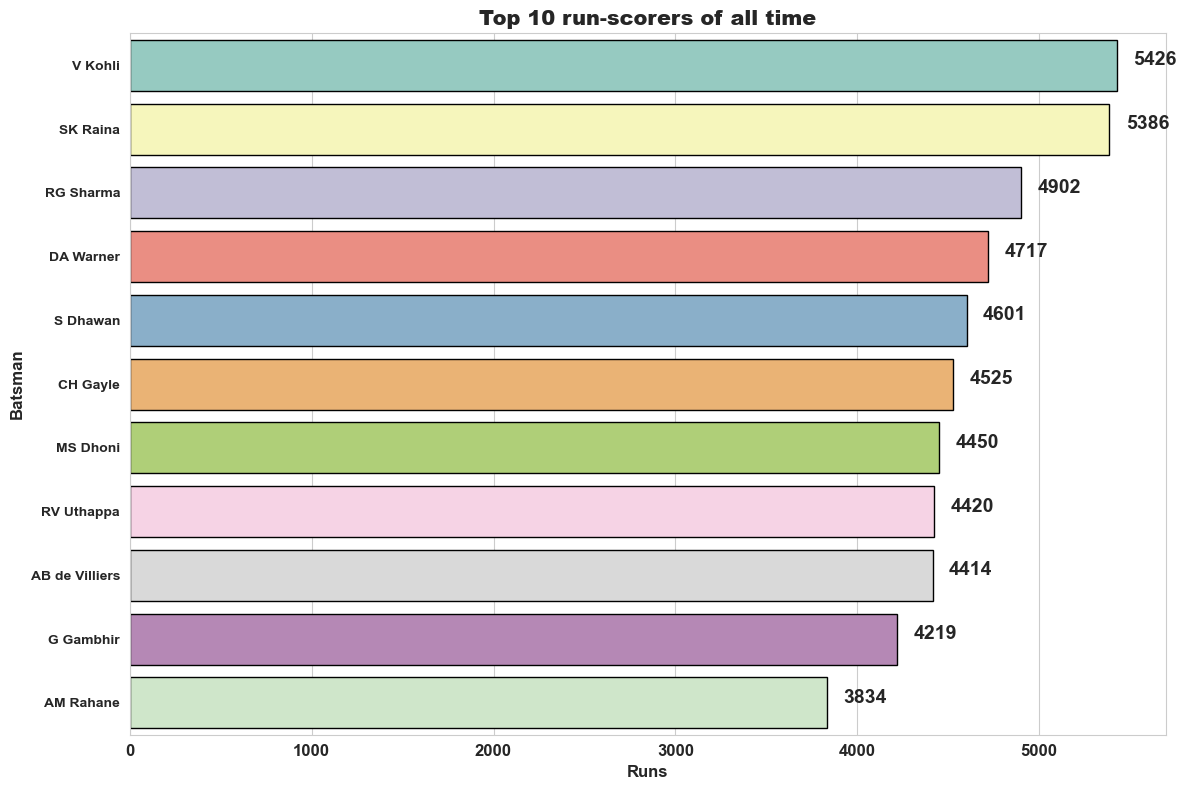

In [9]:
# plot
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
colors=sns.color_palette("Set3")

sns.barplot(y="batsman",x="total_runs",data=top_ten,palette=colors[:11],hue="batsman",edgecolor="black")

for i in top_ten.index:
    plt.text(top_ten["total_runs"][i]+90,i,f"{top_ten['total_runs'][i]}",fontweight=600,fontsize=14)
plt.title("Top 10 run-scorers of all time",fontweight=900,fontsize=15)
plt.xlabel("Runs",fontweight="bold",fontsize=12)
plt.ylabel("Batsman",fontweight="bold",fontsize=12)
plt.xticks(fontweight="bold",fontsize=12)
plt.yticks(fontweight="bold")
plt.tight_layout()
plt.savefig("plots/top_ten_batsman.jpg",dpi=300)
plt.show()



### Top 10 batsmen with most 4s and 6s

In [10]:
df=pd.read_csv(r"R:\IPL-DATA-ANALYSIS\Data\deliveries.csv",usecols=["batsman","batsman_runs"])

In [11]:
df.head()

,batsman,batsman_runs
0,DA Warner,0
1,DA Warner,0
2,DA Warner,4
3,DA Warner,0
4,DA Warner,0


In [12]:
df.tail()

,batsman,batsman_runs
179073,RA Jadeja,1
179074,SR Watson,2
179075,SR Watson,1
179076,SN Thakur,2
179077,SN Thakur,0


In [13]:
df.shape

(179078, 2)

In [14]:
df.isnull().sum()

batsman         0
batsman_runs    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   batsman       179078 non-null  object
 1   batsman_runs  179078 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


In [16]:
df=df.query("batsman_runs == 4 or batsman_runs ==6")

In [17]:
df.reset_index(drop=True,inplace=True)

In [18]:
df

,batsman,batsman_runs
0,DA Warner,4
1,DA Warner,4
2,DA Warner,6
3,MC Henriques,4
4,MC Henriques,4
...,...,...
28557,SR Watson,4
28558,SR Watson,6
28559,SR Watson,6
28560,SR Watson,6


In [19]:
df=df.groupby("batsman")["batsman"].count().reset_index(name="boundary")

In [20]:
df=df.sort_values("boundary",ascending=False)

In [21]:
df.reset_index(drop=True)

,batsman,boundary
0,CH Gayle,703
1,SK Raina,690
2,V Kohli,673
3,DA Warner,640
4,RG Sharma,625
...,...,...
419,S Sharma,1
420,Shivam Sharma,1
421,Sandeep Sharma,1
422,A Mukund,1


In [22]:
top_ten=df.iloc[0:10,0:2]

In [23]:
top_ten

,batsman,boundary
79,CH Gayle,703
353,SK Raina,690
401,V Kohli,673
93,DA Warner,640
305,RG Sharma,625
327,S Dhawan,622
320,RV Uthappa,592
21,AB de Villiers,571
124,G Gambhir,551
367,SR Watson,521


In [24]:
top_ten.reset_index(drop=True,inplace=True)

In [25]:
top_ten.index

RangeIndex(start=0, stop=10, step=1)

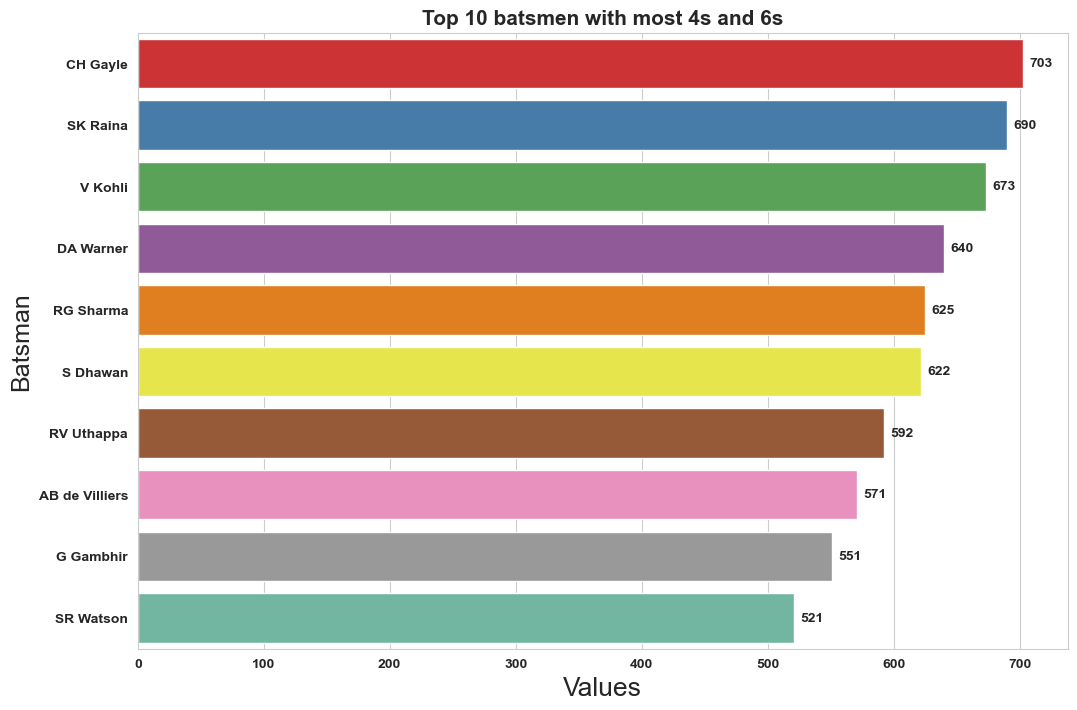

In [26]:
# plot
plt.figure(figsize=[12,8])

sns.set_style("whitegrid")
colors = [
    "#e41a1c",  # red
    "#377eb8",  # blue
    "#4daf4a",  # green
    "#984ea3",  # purple
    "#ff7f00",  # orange
    "#ffff33",  # yellow
    "#a65628",  # brown
    "#f781bf",  # pink
    "#999999",  # gray
    "#66c2a5"   # teal
]


sns.barplot(x="boundary", y="batsman", data=top_ten, palette=colors,hue="batsman")

# Fix here: use range instead of index
for i in range(len(top_ten["batsman"])):
    plt.text(top_ten["boundary"][i]+5, i, f"{top_ten['boundary'][i]}", va='center', fontweight='bold')

plt.title("Top 10 batsmen with most 4s and 6s", fontsize=15, fontweight=700)
plt.xlabel("Values", fontsize=19, fontweight=500)
plt.ylabel("Batsman", fontsize=18, fontweight=500)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")
plt.savefig("plots/topten_boundary",dpi=300)


plt.show()


### Top 10 bowlers with most wickets

In [27]:
bowler_data=pd.read_csv(r"R:\IPL-DATA-ANALYSIS\Data\deliveries.csv",usecols=["bowler","player_dismissed"])

In [28]:
bowler_data.head()

,bowler,player_dismissed
0,TS Mills,NaN
1,TS Mills,NaN
2,TS Mills,NaN
3,TS Mills,NaN
4,TS Mills,NaN


In [29]:
bowler_data.isnull().sum()

bowler                   0
player_dismissed    170244
dtype: int64

In [30]:
bowler_data=bowler_data.dropna()

In [31]:
bowler_data.isnull().sum()

bowler              0
player_dismissed    0
dtype: int64

In [32]:
bowler_data.head()

,bowler,player_dismissed
11,A Choudhary,DA Warner
64,STR Binny,S Dhawan
94,YS Chahal,MC Henriques
116,TS Mills,Yuvraj Singh
160,Rashid Khan,Mandeep Singh


In [33]:
bowler=bowler_data.groupby("bowler")["bowler"].count().reset_index(name="wickets")
bowler

,bowler,wickets
0,A Ashish Reddy,19
1,A Chandila,11
2,A Choudhary,5
3,A Flintoff,2
4,A Joseph,6
...,...,...
347,YA Abdulla,15
348,YK Pathan,46
349,YS Chahal,102
350,Yuvraj Singh,39


In [34]:
bowler.columns

Index(['bowler', 'wickets'], dtype='object')

In [35]:
bowler.index

RangeIndex(start=0, stop=352, step=1)

In [36]:
sort_top=bowler.sort_values("wickets",ascending=False).reset_index(drop=True)
sort_top

,bowler,wickets
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
...,...,...
347,BMAJ Mendis,1
348,SS Sarkar,1
349,SS Mundhe,1
350,Swapnil Singh,1


In [37]:
top_ten=sort_top.iloc[0:11,0:2]

In [38]:
top_ten

,bowler,wickets
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


C:\Users\RiteshNain\AppData\Local\Temp\ipykernel_24868\1656033234.py:5: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="wickets",y="bowler",data=top_ten,palette=colors,hue="bowler")


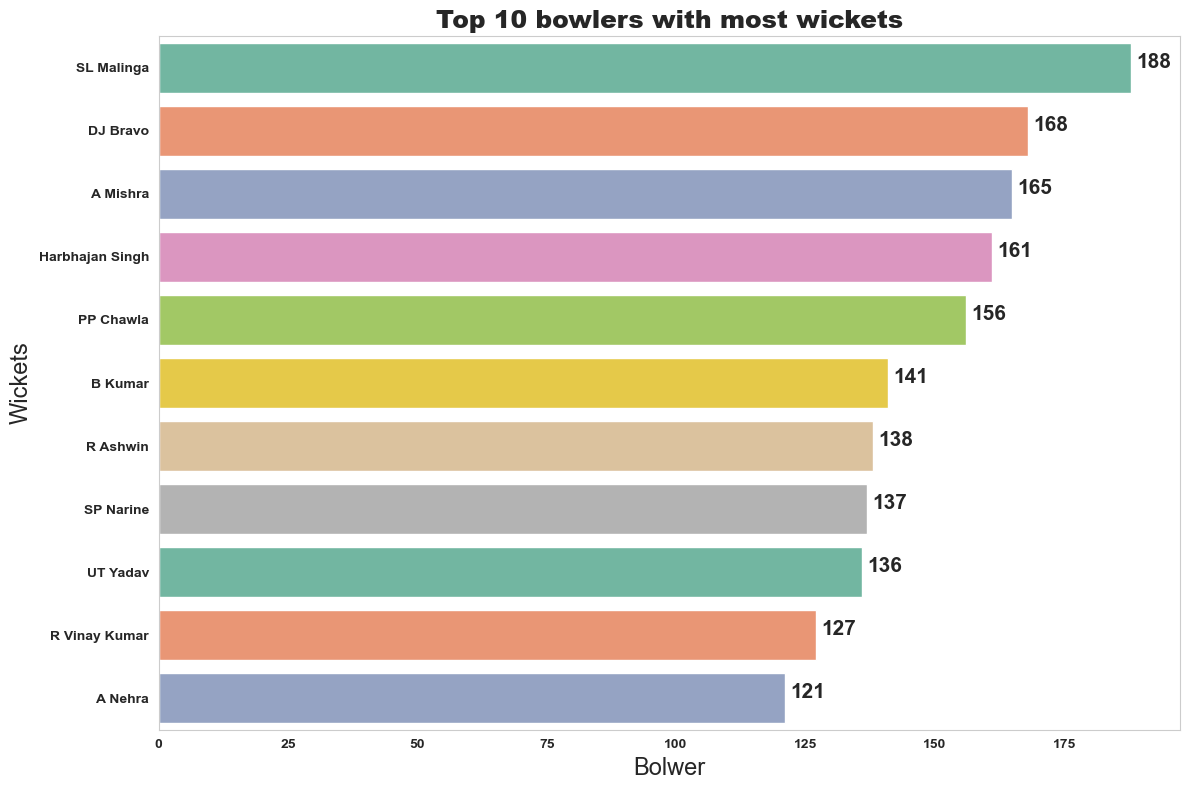

In [39]:
# plotting
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
colors=sns.color_palette("Set2")
sns.barplot(x="wickets",y="bowler",data=top_ten,palette=colors,hue="bowler")
for i in range(len(top_ten["bowler"])):
    plt.text(top_ten["wickets"][i]+1,i,f"{top_ten['wickets'][i]}",fontsize=15,fontweight=600)
plt.title("Top 10 bowlers with most wickets",fontsize=18,fontweight=800)
plt.xlabel("Bolwer",fontsize=17,fontweight=500)
plt.ylabel("Wickets",fontsize=17,fontweight=500)
plt.xticks(fontweight=600)
plt.yticks(fontweight=600)
plt.grid(False)

plt.tight_layout()
plt.savefig("plots/top_bowler.jpg",dpi=300)
plt.show()


### Best finishers (most runs in last 5 overs: over 16-20)

In [40]:
finisher=pd.read_csv(r"R:\IPL-DATA-ANALYSIS\Data\deliveries.csv",usecols=["batting_team","over","total_runs"])

In [41]:
finisher=finisher.replace({"Rising Pune Supergiants":"Rising Pune Supergiant"})

In [42]:
finisher.head()

,batting_team,over,total_runs
0,Sunrisers Hyderabad,1,0
1,Sunrisers Hyderabad,1,0
2,Sunrisers Hyderabad,1,4
3,Sunrisers Hyderabad,1,0
4,Sunrisers Hyderabad,1,2


In [43]:
finisher.isnull().sum()

batting_team    0
over            0
total_runs      0
dtype: int64

In [44]:
finisher=finisher.query("15<over<21")

In [45]:
finisher.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40400 entries, 93 to 179077
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   batting_team  40400 non-null  object
 1   over          40400 non-null  int64 
 2   total_runs    40400 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [46]:
finisher.tail()

,batting_team,over,total_runs
179073,Chennai Super Kings,20,1
179074,Chennai Super Kings,20,2
179075,Chennai Super Kings,20,1
179076,Chennai Super Kings,20,2
179077,Chennai Super Kings,20,0


In [47]:
finisher=finisher.groupby(["batting_team","over"])["total_runs"].sum().reset_index(name="runs")

In [48]:
finisher

,batting_team,over,runs
0,Chennai Super Kings,16,1434
1,Chennai Super Kings,17,1490
2,Chennai Super Kings,18,1597
3,Chennai Super Kings,19,1567
4,Chennai Super Kings,20,1517
...,...,...,...
65,Sunrisers Hyderabad,16,866
66,Sunrisers Hyderabad,17,813
67,Sunrisers Hyderabad,18,974
68,Sunrisers Hyderabad,19,1022


In [49]:
best_finisher=finisher.groupby("batting_team")["runs"].sum().reset_index(name="total_run")
best_finisher=best_finisher.sort_values("total_run",ascending=False).reset_index(drop=True)
best_finisher

,batting_team,total_run
0,Mumbai Indians,8591
1,Royal Challengers Bangalore,7881
2,Chennai Super Kings,7605
3,Kings XI Punjab,7302
4,Kolkata Knight Riders,7164
5,Delhi Daredevils,6307
6,Rajasthan Royals,5740
7,Sunrisers Hyderabad,4576
8,Deccan Chargers,3133
9,Pune Warriors,1733


C:\Users\RiteshNain\AppData\Local\Temp\ipykernel_24868\2101621725.py:4: UserWarning: 
The palette list has fewer values (12) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="total_run",y="batting_team",data=best_finisher,palette=colors,hue="batting_team",edgecolor="black")


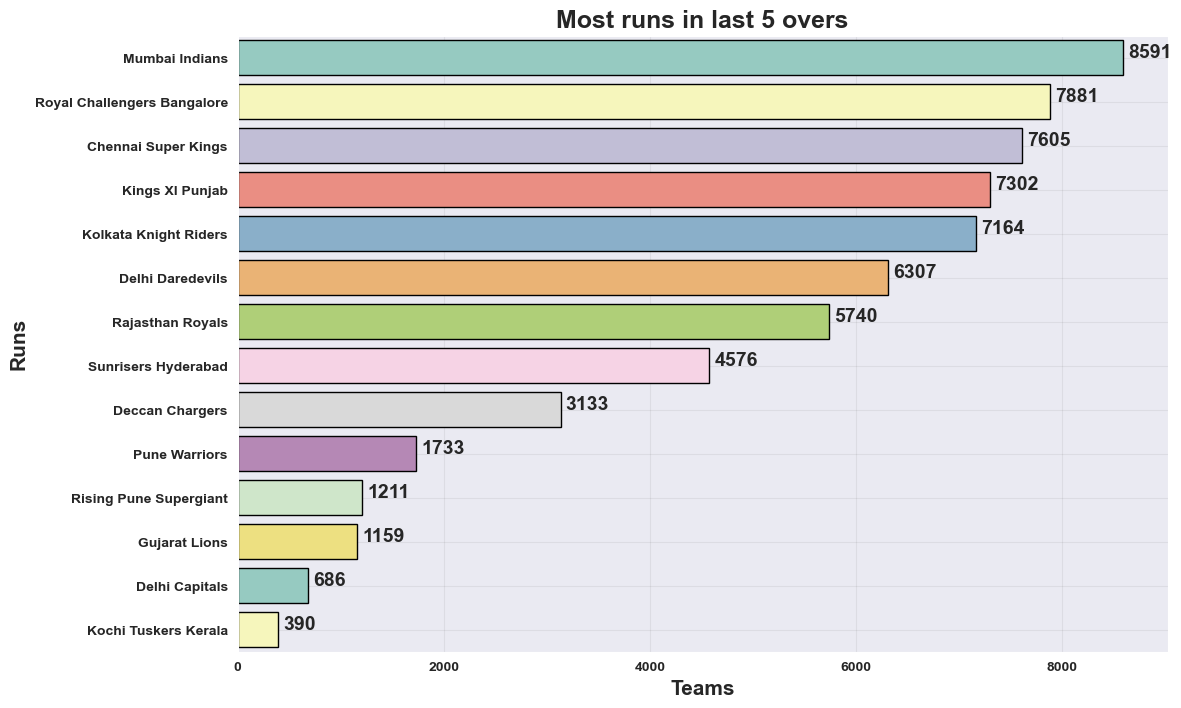

In [50]:
plt.figure(figsize=(12,8))
sns.set_style("dark")
colors=sns.color_palette("Set3")
sns.barplot(x="total_run",y="batting_team",data=best_finisher,palette=colors,hue="batting_team",edgecolor="black")
for i in range(len(best_finisher["batting_team"])):
    plt.text(best_finisher["total_run"][i]+50,i,f"{best_finisher['total_run'][i]}",fontweight=600,fontsize=14)
   
 
plt.grid(True,color="black",alpha=0.06)
plt.title("Most runs in last 5 overs",fontsize=18,fontweight=700)
plt.xlabel("Teams",fontweight=600,fontsize=15)
plt.ylabel("Runs",fontweight=600,fontsize=15)
plt.xticks(fontweight=600)
plt.yticks(fontweight=600)
plt.tight_layout
plt.savefig("plots/most_run_5_over.jpg",dpi=300)
plt.show()

### Most ‘Player of the Match’ awards

In [51]:
player=pd.read_csv(r"R:\IPL-DATA-ANALYSIS\Data\matches.csv",usecols=["player_of_match"])

In [52]:
player.isnull().sum()

player_of_match    4
dtype: int64

In [53]:
player=player.dropna(subset="player_of_match")

In [54]:
player.isnull().sum()

player_of_match    0
dtype: int64

In [55]:
player=player.groupby("player_of_match")["player_of_match"].count().reset_index(name="award")

In [56]:
player

,player_of_match,award
0,A Chandila,1
1,A Joseph,1
2,A Kumble,3
3,A Mishra,11
4,A Nehra,6
...,...,...
221,Washington Sundar,1
222,YK Pathan,16
223,YS Chahal,1
224,Yuvraj Singh,5


In [57]:
player=player.sort_values(by="award",ascending=False)

In [58]:
player

,player_of_match,award
35,CH Gayle,21
10,AB de Villiers,20
42,DA Warner,17
137,MS Dhoni,17
167,RG Sharma,17
...,...,...
213,TM Dilshan,1
221,Washington Sundar,1
220,WPUJC Vaas,1
223,YS Chahal,1


In [59]:
player=player.reset_index(drop=True)

In [60]:
#top_5
top_5=player.iloc[0:5,:]

In [61]:
top_5

,player_of_match,award
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17


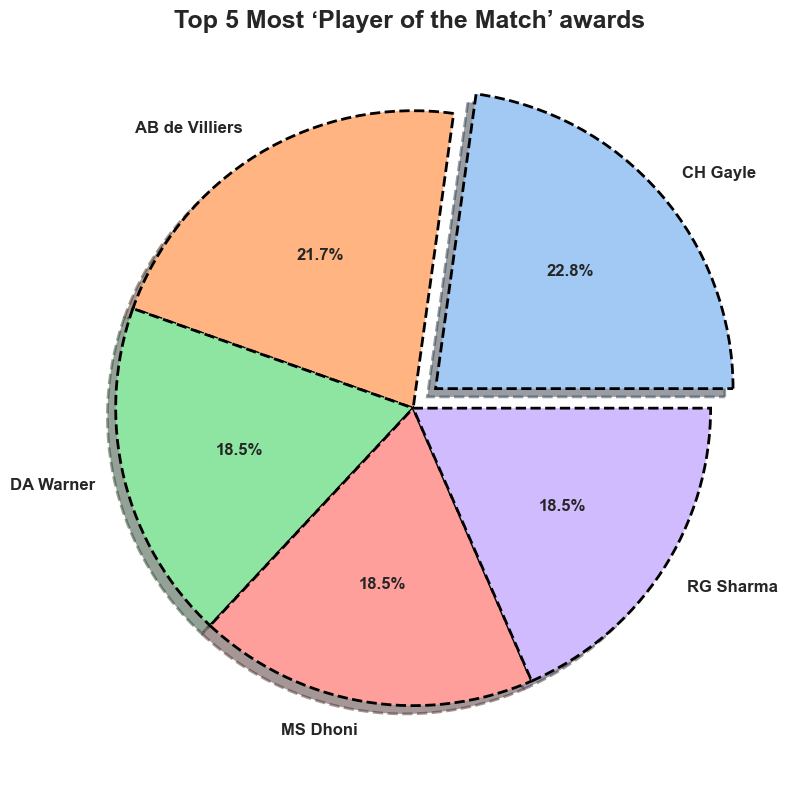

In [62]:
# plot

plt.figure(figsize=(12,8))
colors = ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF']
explode=[0.1,0,0,0,0]
plt.pie(top_5["award"],labels=top_5["player_of_match"],autopct="%0.1f%%",shadow=True,colors=colors,textprops={'fontsize':12,'fontweight':600},explode=explode,wedgeprops={'edgecolor':'black','linestyle':'--','linewidth':2})
plt.title("Top 5 Most ‘Player of the Match’ awards ",fontweight=700,fontsize=18)
plt.tight_layout()
plt.savefig("plots/player_of_match.jpg",dpi=300)
plt.show()


### Top performing batsmen against specific teams

In [88]:
batsmen=pd.read_csv(r"R:\projects\IPL-DATA-ANALYSIS\Data\deliveries.csv",usecols=["batsman","bowling_team","batsman_runs"])

In [89]:
batsmen.head()

,bowling_team,batsman,batsman_runs
0,Royal Challengers Bangalore,DA Warner,0
1,Royal Challengers Bangalore,DA Warner,0
2,Royal Challengers Bangalore,DA Warner,4
3,Royal Challengers Bangalore,DA Warner,0
4,Royal Challengers Bangalore,DA Warner,0


In [90]:
batsmen=batsmen.groupby(["bowling_team","batsman"])["batsman_runs"].count().reset_index(name='total_runs')
batsmen

,bowling_team,batsman,total_runs
0,Chennai Super Kings,A Ashish Reddy,25
1,Chennai Super Kings,A Hales,9
2,Chennai Super Kings,A Kumble,6
3,Chennai Super Kings,A Mishra,64
4,Chennai Super Kings,A Mithun,8
...,...,...,...
3116,Sunrisers Hyderabad,Washington Sundar,5
3117,Sunrisers Hyderabad,YK Pathan,182
3118,Sunrisers Hyderabad,YS Chahal,11
3119,Sunrisers Hyderabad,Yuvraj Singh,66


In [94]:
batsmen=batsmen.sort_values('total_runs',ascending=False)


In [95]:
batsmen

,bowling_team,batsman,total_runs
1589,Kolkata Knight Riders,RG Sharma,626
299,Chennai Super Kings,V Kohli,616
1085,Kings XI Punjab,G Gambhir,613
1618,Kolkata Knight Riders,SK Raina,613
1948,Mumbai Indians,SK Raina,608
...,...,...,...
397,Deccan Chargers,KP Appanna,1
3005,Sunrisers Hyderabad,M Ashwin,1
3010,Sunrisers Hyderabad,M Morkel,1
137,Chennai Super Kings,Kuldeep Yadav,1


In [100]:
top_batsmen=batsmen.iloc[:5,:]
top_batsmen=top_batsmen.reset_index(drop=True)

In [101]:
top_batsmen

,bowling_team,batsman,total_runs
0,Kolkata Knight Riders,RG Sharma,626
1,Chennai Super Kings,V Kohli,616
2,Kings XI Punjab,G Gambhir,613
3,Kolkata Knight Riders,SK Raina,613
4,Mumbai Indians,SK Raina,608


In [152]:
top_batsmen['batsmanVSteam']=top_batsmen["batsman"] +" VS "+top_batsmen["bowling_team"].replace({"Kolkata Knight Riders":"KKR","Chennai Super Kings":"CSK","Kings XI Punjab":"PUNJAB","Mumbai Indians":"MI"})
top_batsmen

,bowling_team,batsman,total_runs,batsmanVSteam
0,Kolkata Knight Riders,RG Sharma,626,RG Sharma VS KKR
1,Chennai Super Kings,V Kohli,616,V Kohli VS CSK
2,Kings XI Punjab,G Gambhir,613,G Gambhir VS PUNJAB
3,Kolkata Knight Riders,SK Raina,613,SK Raina VS KKR
4,Mumbai Indians,SK Raina,608,SK Raina VS MI


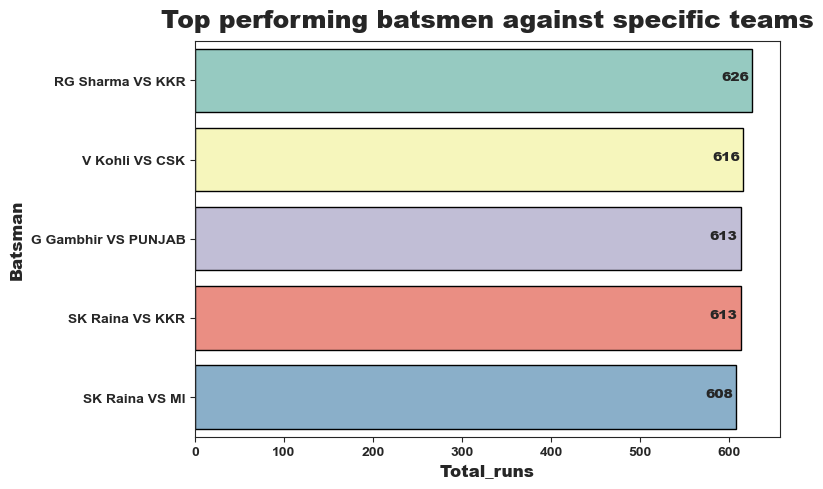

In [168]:
#plot
sns.set_style("ticks")
plt.figure(figsize=(8,5))
colors=sns.color_palette("Set3",n_colors=len(top_batsmen['batsmanVSteam']))
sns.barplot(x="total_runs",y='batsmanVSteam',data=top_batsmen,palette=colors,hue='batsmanVSteam',edgecolor='black')
for i in range(len(top_batsmen['batsman'])):
    plt.text(top_batsmen["total_runs"].iloc[i]-35,i,f"{top_batsmen['total_runs'].iloc[i]}",fontweight=800)

plt.title("Top performing batsmen against specific teams",fontsize=18,fontweight=800,pad=10)
plt.xlabel("Total_runs",fontweight=800,fontsize=12)
plt.ylabel("Batsman",fontweight=800,fontsize=12)
plt.xticks(fontweight=600)
plt.yticks(fontweight=600)
plt.tight_layout()
plt.savefig("plots/batsmen_against_specific_team.jpg")

In [ ]:
### 